Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

## Data preparation

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns
import time
from itertools import product


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.compose import make_column_transformer

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

import xgboost as xgb

from sklearn.linear_model import LinearRegression

import lightgbm as lgb

from catboost import CatBoostRegressor

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
#importing data
df = pd.read_csv('/datasets/car_data.csv')

In [4]:
#inspecting data
df.sample(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
323454,08/03/2016 07:36,0,bus,1996,manual,116,transporter,150000,8,petrol,volkswagen,no,08/03/2016 00:00,0,15926,05/04/2016 23:18
26195,26/03/2016 21:51,11800,sedan,2011,auto,156,other,40000,2,petrol,citroen,no,26/03/2016 00:00,0,90587,06/04/2016 14:17
251594,29/03/2016 12:53,200,small,1995,manual,60,corsa,150000,9,NaN,opel,NaN,29/03/2016 00:00,0,67308,29/03/2016 12:53
197310,15/03/2016 21:50,7350,small,2011,NaN,71,fortwo,30000,11,petrol,smart,no,15/03/2016 00:00,0,30853,07/04/2016 07:17
145238,30/03/2016 00:59,3333,coupe,2002,manual,129,other,150000,3,lpg,mercedes_benz,no,30/03/2016 00:00,0,66763,06/04/2016 22:45
38348,10/03/2016 14:58,500,NaN,2016,manual,0,vectra,150000,0,petrol,opel,yes,10/03/2016 00:00,0,32312,05/04/2016 11:50
182521,22/03/2016 15:57,1000,sedan,1991,manual,109,other,150000,12,petrol,mercedes_benz,NaN,22/03/2016 00:00,0,38173,22/03/2016 15:57
352098,07/03/2016 23:53,3699,small,2008,auto,84,fortwo,125000,3,petrol,smart,no,07/03/2016 00:00,0,70806,22/03/2016 04:18
285865,03/04/2016 13:43,3800,convertible,1999,manual,116,3er,150000,5,NaN,bmw,no,03/04/2016 00:00,0,23556,05/04/2016 12:19
353616,16/03/2016 18:46,8990,bus,2011,manual,90,kangoo,80000,10,gasoline,renault,no,16/03/2016 00:00,0,51702,04/04/2016 23:45


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [6]:
df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [7]:
#changing column names to lower case
df.columns = df.columns.str.lower()

In [8]:
df.corr()

,price,registrationyear,power,mileage,registrationmonth,numberofpictures,postalcode
price,1.000000,0.026916,0.158872,-0.333199,0.110581,NaN,0.076055
registrationyear,0.026916,1.000000,-0.000828,-0.053447,-0.011619,NaN,-0.003459
power,0.158872,-0.000828,1.000000,0.024002,0.043380,NaN,0.021665
mileage,-0.333199,-0.053447,0.024002,1.000000,0.009571,NaN,-0.007698
registrationmonth,0.110581,-0.011619,0.043380,0.009571,1.000000,NaN,0.013995
numberofpictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postalcode,0.076055,-0.003459,0.021665,-0.007698,0.013995,NaN,1.000000


To prepare the data for analysis y our models we must:

- Change time data to datetime objects
- Remove outliers for some columns 
- Imputate missing values 

### `date`, `datecreated`, `lastseen`

In [9]:
#changing to datetime and inspecting
df['datecrawled'] = pd.to_datetime(df['datecrawled'], format = '%d/%m/%Y %H:%M')
df['datecrawled'].describe(datetime_is_numeric=True)

count                           354369
mean     2016-03-21 12:57:41.165057280
min                2016-03-05 14:06:00
25%                2016-03-13 11:52:00
50%                2016-03-21 17:50:00
75%                2016-03-29 14:37:00
max                2016-04-07 14:36:00
Name: datecrawled, dtype: object

In [10]:
#changing to datetime and inspecting
df['datecreated'] = pd.to_datetime(df['datecreated'], format = '%d/%m/%Y %H:%M')
df['datecreated'].describe(datetime_is_numeric=True)

count                           354369
mean     2016-03-20 19:12:07.753274112
min                2014-03-10 00:00:00
25%                2016-03-13 00:00:00
50%                2016-03-21 00:00:00
75%                2016-03-29 00:00:00
max                2016-04-07 00:00:00
Name: datecreated, dtype: object

In [11]:
#changing to datetime and inspecting
df['lastseen'] = pd.to_datetime(df['lastseen'], format = '%d/%m/%Y %H:%M')
df['lastseen'].describe(datetime_is_numeric=True)

count                           354369
mean     2016-03-29 23:50:30.593703680
min                2016-03-05 14:15:00
25%                2016-03-23 02:50:00
50%                2016-04-03 15:15:00
75%                2016-04-06 10:15:00
max                2016-04-07 14:58:00
Name: lastseen, dtype: object

No missing values or clear outliers here.

### `price`

In [12]:
#inspecting data
df['price'].describe()

count    354369.000000
mean       4416.656776
std        4514.158514
min           0.000000
25%        1050.000000
50%        2700.000000
75%        6400.000000
max       20000.000000
Name: price, dtype: float64

There are some cars listed for 0. This may or may not be an error as, for instance, some may be offereed for scrap for collection.

Let's take a closer look a the price distribution and see what sort of cars are listed for very cheap.

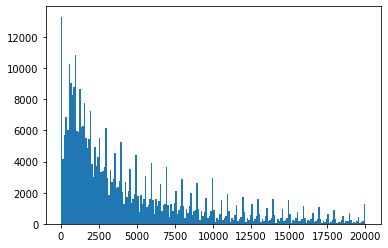

In [13]:
plt.hist(df['price'], bins = 200)
plt.show()

In [14]:
#checking cheapest cars
df[df['price'] < 100]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
7,2016-03-21 18:54:00,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21,0,19348,2016-03-25 16:47:00
40,2016-03-26 22:06:00,0,NaN,1990,NaN,0,corsa,150000,1,petrol,opel,NaN,2016-03-26,0,56412,2016-03-27 17:43:00
59,2016-03-29 15:48:00,1,suv,1994,manual,286,NaN,150000,11,NaN,sonstige_autos,NaN,2016-03-29,0,53721,2016-04-06 01:44:00
89,2016-03-28 09:37:00,1,sedan,1995,manual,113,e_klasse,150000,4,gasoline,mercedes_benz,no,2016-03-28,0,40589,2016-04-06 12:15:00
111,2016-03-19 18:40:00,0,NaN,2017,manual,0,golf,5000,12,petrol,volkswagen,NaN,2016-03-19,0,21698,2016-04-01 08:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354238,2016-03-20 14:55:00,0,small,2002,manual,60,fiesta,150000,3,petrol,ford,NaN,2016-03-20,0,33659,2016-04-06 18:45:00
354248,2016-03-24 13:48:00,0,small,1999,manual,53,swift,150000,3,petrol,suzuki,NaN,2016-03-24,0,42329,2016-04-07 05:17:00
354277,2016-03-10 22:55:00,0,small,1999,manual,37,arosa,150000,7,petrol,seat,yes,2016-03-10,0,22559,2016-03-12 23:46:00
354309,2016-03-09 22:37:00,99,small,1999,manual,60,arosa,150000,1,petrol,seat,yes,2016-03-09,0,91301,2016-04-06 22:15:00


There appears to be cars listed for very low amounts that appear to be unrealistic, for example a Mercedez Benz for 1 Euro.

It's likely that some of these listings would not actually sell for that amount, but have been lsited at low prices to gain more views.

We can remove some of these outliers by looking at prices for a particular brand and model of car and removing those which are more than 3 standard deviations away from the mean.

In [15]:
def remove_outliers(df, col_to_remove, col1_to_use, col2_to_use, sd = 3):
    """
    Takes a dataframe, a column for which outliers are to be removed, and two columns to use for slicing data.
    sd denotes the number of standard devations away from the mean for which to remove outliers
    """
    d = 0
    for i in df[col1_to_use].unique():
        for j in df[df[col1_to_use] == i][col2_to_use].unique():
            
            #slicing data
            temp_df = df[(df[col1_to_use] == i) & (df[col2_to_use] == j)]
            data = temp_df[col_to_remove]
            #calculating mean and sd for sliced data
            data_mean, data_std = np.mean(data), np.std(data)
            cut_off = data_std * sd
            lower, upper = data_mean - cut_off, data_mean + cut_off
            #removing outleirs
            to_drop = temp_df.loc[(temp_df[col_to_remove]<lower) | (temp_df[col_to_remove]>upper)]
            df.drop(to_drop.index, inplace = True)
            d += len(to_drop)

    print('dropped:',d)
    df.reset_index(drop = True, inplace=True)
    return df

In [16]:
#removing outliers for price for given brand and model
remove_outliers(df, 'price', 'brand', 'model')

dropped: 4580


,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:00,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:00
1,2016-03-24 10:58:00,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:00
2,2016-03-14 12:52:00,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:00
3,2016-03-17 16:54:00,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:00
4,2016-03-31 17:25:00,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349784,2016-03-21 09:50:00,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21,0,2694,2016-03-21 10:42:00
349785,2016-03-14 17:48:00,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14,0,39576,2016-04-06 00:46:00
349786,2016-03-05 19:56:00,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05,0,26135,2016-03-11 18:17:00
349787,2016-03-19 18:57:00,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:00


In [17]:
#checking changes
df['price'].describe()

count    349789.000000
mean       4286.547819
std        4365.271874
min           0.000000
25%        1000.000000
50%        2650.000000
75%        6100.000000
max       20000.000000
Name: price, dtype: float64

Still some low values remain in place but extreme outliers have been removed.

### `vehicletype`

In [18]:
#checking data
df['vehicletype'].value_counts()

sedan          90343
small          78588
wagon          64410
bus            28335
convertible    19805
coupe          15871
suv            11854
other           3250
Name: vehicletype, dtype: int64

In [19]:
#checking null values
df[df['vehicletype'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:00,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:00
16,2016-04-01 12:46:00,300,NaN,2016,NaN,60,polo,150000,0,petrol,volkswagen,NaN,2016-04-01,0,38871,2016-04-01 12:46:00
22,2016-03-23 14:52:00,2900,NaN,2018,manual,90,meriva,150000,5,petrol,opel,no,2016-03-23,0,49716,2016-03-31 01:16:00
26,2016-03-10 19:38:00,5555,NaN,2017,manual,125,c4,125000,4,NaN,citroen,no,2016-03-10,0,31139,2016-03-16 09:16:00
31,2016-03-29 16:57:00,899,NaN,2016,manual,60,clio,150000,6,petrol,renault,NaN,2016-03-29,0,37075,2016-03-29 17:43:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349766,2016-03-07 17:06:00,2600,NaN,2005,auto,0,c_klasse,150000,9,NaN,mercedes_benz,NaN,2016-03-07,0,61169,2016-03-08 21:28:00
349771,2016-03-11 23:40:00,1900,NaN,2000,manual,110,NaN,150000,7,NaN,volkswagen,no,2016-03-11,0,87700,2016-03-12 14:16:00
349781,2016-03-09 13:37:00,5250,NaN,2016,auto,150,159,150000,12,NaN,alfa_romeo,no,2016-03-09,0,51371,2016-03-13 01:44:00
349784,2016-03-21 09:50:00,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21,0,2694,2016-03-21 10:42:00


A large number of null values.
We can imputate the vehicle type by looking at listings with the same model and brand, and taking the modal vehicle type listed.

In [20]:
def replace_null(df, col_to_replace, col1_to_use, col2_to_use, average = 'mode'):
    """
    Takes two columns, finds the selected average value of non-null values in target column that have matching two columns, replaces null values in target column with modal value
    """
    null_df = df[df[col_to_replace].isnull()]
    for i in null_df[col1_to_use].unique():
        for j in null_df[null_df[col1_to_use] == i][col2_to_use].unique():
            temp_df = df[(df[col1_to_use] == i) & (df[col2_to_use] == j) & (df[col_to_replace].notnull())]
            unchanged = []
            if average == 'mode':
                try:
                    avg = temp_df[col_to_replace].value_counts().index[0]
                except:
                    unchanged.append((i,j))
                    mode = np.nan
            
            elif average == 'mean':
                try:
                    avg = temp_df[col_to_replace].mean()
                except:
                    unchanged.append((i,j))
                    avg = np.nan 
                    
            elif average == 'median':
                try:
                    avg = temp_df[col_to_replace].median()
                except:
                    unchanged.append((i,j))
                    avg = np.nan  
            else:
                print('Incorrect string for average: use \'median\', \'mean\' or \'mode\' .')
                break
                
            to_replace = df[(df[col1_to_use] == i) & (df[col2_to_use] == j) & (df[col_to_replace].isnull())].index.tolist()
                
            if len(to_replace)>0:
                df.loc[to_replace, col_to_replace] = avg
            
        
    return df

In [21]:
#replacing null values
replace_null(df, 'vehicletype', 'brand', 'model', average = 'mode')
df[df['vehicletype'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
257,2016-04-04 09:49:00,450,NaN,2016,manual,0,NaN,150000,3,petrol,mitsubishi,no,2016-04-04,0,59302,2016-04-06 11:17:00
303,2016-03-21 14:38:00,200,NaN,2009,NaN,0,NaN,10000,0,NaN,sonstige_autos,NaN,2016-03-21,0,6493,2016-03-24 02:47:00
427,2016-03-27 18:43:00,1300,NaN,2017,manual,150,NaN,150000,10,NaN,volkswagen,no,2016-03-27,0,70374,2016-04-05 15:15:00
435,2016-03-24 16:46:00,1950,NaN,2017,manual,0,NaN,150000,7,petrol,volkswagen,no,2016-03-24,0,70376,2016-03-30 18:16:00
470,2016-03-24 17:49:00,0,NaN,2000,manual,0,NaN,150000,0,NaN,audi,yes,2016-03-24,0,72514,2016-03-29 03:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349504,2016-03-30 07:54:00,0,NaN,2000,NaN,0,NaN,150000,0,NaN,sonstige_autos,NaN,2016-03-30,0,6686,2016-04-06 23:46:00
349583,2016-03-07 19:51:00,1500,NaN,1995,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-07,0,26789,2016-04-03 11:46:00
349758,2016-03-31 19:52:00,180,NaN,1995,NaN,0,NaN,125000,3,petrol,opel,NaN,2016-03-31,0,41470,2016-04-06 14:18:00
349771,2016-03-11 23:40:00,1900,NaN,2000,manual,110,NaN,150000,7,NaN,volkswagen,no,2016-03-11,0,87700,2016-03-12 14:16:00


In [22]:
df[df['vehicletype'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
257,2016-04-04 09:49:00,450,NaN,2016,manual,0,NaN,150000,3,petrol,mitsubishi,no,2016-04-04,0,59302,2016-04-06 11:17:00
303,2016-03-21 14:38:00,200,NaN,2009,NaN,0,NaN,10000,0,NaN,sonstige_autos,NaN,2016-03-21,0,6493,2016-03-24 02:47:00
427,2016-03-27 18:43:00,1300,NaN,2017,manual,150,NaN,150000,10,NaN,volkswagen,no,2016-03-27,0,70374,2016-04-05 15:15:00
435,2016-03-24 16:46:00,1950,NaN,2017,manual,0,NaN,150000,7,petrol,volkswagen,no,2016-03-24,0,70376,2016-03-30 18:16:00
470,2016-03-24 17:49:00,0,NaN,2000,manual,0,NaN,150000,0,NaN,audi,yes,2016-03-24,0,72514,2016-03-29 03:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349504,2016-03-30 07:54:00,0,NaN,2000,NaN,0,NaN,150000,0,NaN,sonstige_autos,NaN,2016-03-30,0,6686,2016-04-06 23:46:00
349583,2016-03-07 19:51:00,1500,NaN,1995,NaN,0,NaN,150000,0,NaN,volkswagen,NaN,2016-03-07,0,26789,2016-04-03 11:46:00
349758,2016-03-31 19:52:00,180,NaN,1995,NaN,0,NaN,125000,3,petrol,opel,NaN,2016-03-31,0,41470,2016-04-06 14:18:00
349771,2016-03-11 23:40:00,1900,NaN,2000,manual,110,NaN,150000,7,NaN,volkswagen,no,2016-03-11,0,87700,2016-03-12 14:16:00


A small number of null values remain, most where we do not know the model.
We can remove these witout to much issue as it would be very hard to predict a price without knowing a model.

In [23]:
df = df[df['vehicletype'].notnull()]

### `registrationyear`

In [24]:
#checking data
df['registrationyear'].describe()

count    342961.000000
mean       2003.602783
std          67.179017
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        9999.000000
Name: registrationyear, dtype: float64

In [25]:
#Removing those with unrealistic values
df = df[(df['registrationyear'] <2017) & (df['registrationyear'] >1950)]

In [26]:
#remving outliers for specific models
remove_outliers(df, 'registrationyear', 'brand', 'model')

dropped: 2246


,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:00,480,sedan,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:00
1,2016-03-24 10:58:00,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:00
2,2016-03-14 12:52:00,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:00
3,2016-03-17 16:54:00,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:00
4,2016-03-31 17:25:00,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,2016-03-27 20:36:00,1150,bus,2000,manual,0,zafira,150000,3,petrol,opel,no,2016-03-27,0,26624,2016-03-29 10:17:00
328131,2016-03-21 09:50:00,0,sedan,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21,0,2694,2016-03-21 10:42:00
328132,2016-03-05 19:56:00,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05,0,26135,2016-03-11 18:17:00
328133,2016-03-19 18:57:00,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:00


In [27]:
#checking fix
df[df['registrationyear'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen


### `gearbox`

In [28]:
df['gearbox'].value_counts()

manual    250737
auto       62547
Name: gearbox, dtype: int64

In [29]:
#checking null values
df[df['gearbox'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
15,2016-04-01 12:46:00,300,small,2016,NaN,60,polo,150000,0,petrol,volkswagen,NaN,2016-04-01,0,38871,2016-04-01 12:46:00
29,2016-03-15 20:59:00,245,sedan,1994,NaN,0,golf,150000,2,petrol,volkswagen,no,2016-03-15,0,44145,2016-03-17 18:17:00
34,2016-03-28 17:50:00,1500,bus,2016,NaN,0,kangoo,150000,1,gasoline,renault,no,2016-03-28,0,46483,2016-03-30 09:18:00
37,2016-03-26 22:06:00,0,small,1990,NaN,0,corsa,150000,1,petrol,opel,NaN,2016-03-26,0,56412,2016-03-27 17:43:00
61,2016-04-01 11:56:00,1200,coupe,2001,NaN,0,astra,150000,0,NaN,opel,NaN,2016-04-01,0,47249,2016-04-07 08:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328031,2016-03-09 17:59:00,399,other,1994,NaN,1103,3er,150000,0,NaN,bmw,NaN,2016-03-09,0,56235,2016-03-17 09:17:00
328056,2016-03-28 18:50:00,3500,small,2001,NaN,75,corsa,90000,4,petrol,opel,no,2016-03-28,0,49740,2016-04-07 01:15:00
328059,2016-03-16 13:36:00,3300,wagon,2006,NaN,0,touran,150000,7,gasoline,volkswagen,NaN,2016-03-16,0,12057,2016-03-17 12:17:00
328075,2016-04-03 13:46:00,3500,small,1995,NaN,0,polo,150000,0,NaN,volkswagen,NaN,2016-04-03,0,74579,2016-04-05 12:44:00


In [30]:
#replacing null values with most common for other listings of the same model
replace_null(df, 'gearbox', 'brand', 'model')

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:00,480,sedan,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:00
1,2016-03-24 10:58:00,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:00
2,2016-03-14 12:52:00,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:00
3,2016-03-17 16:54:00,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:00
4,2016-03-31 17:25:00,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,2016-03-27 20:36:00,1150,bus,2000,manual,0,zafira,150000,3,petrol,opel,no,2016-03-27,0,26624,2016-03-29 10:17:00
328131,2016-03-21 09:50:00,0,sedan,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21,0,2694,2016-03-21 10:42:00
328132,2016-03-05 19:56:00,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05,0,26135,2016-03-11 18:17:00
328133,2016-03-19 18:57:00,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:00


In [31]:
df[df['gearbox'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
105,2016-03-20 18:53:00,0,small,1999,NaN,0,NaN,5000,0,petrol,volkswagen,NaN,2016-03-20,0,37520,2016-04-07 02:45:00
141,2016-03-27 20:47:00,6799,small,2009,NaN,60,NaN,20000,5,petrol,volkswagen,no,2016-03-27,0,89077,2016-03-27 20:47:00
150,2016-03-28 10:50:00,1495,wagon,2001,NaN,64,NaN,150000,9,gasoline,volkswagen,NaN,2016-03-28,0,99086,2016-04-04 11:45:00
173,2016-03-16 15:51:00,14000,sedan,2008,NaN,235,NaN,150000,0,NaN,bmw,no,2016-02-12,0,95131,2016-04-07 14:56:00
591,2016-03-30 11:55:00,15000,coupe,1971,NaN,0,NaN,5000,4,NaN,sonstige_autos,no,2016-03-30,0,51145,2016-04-07 02:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326290,2016-03-07 07:51:00,5100,suv,2006,NaN,0,NaN,150000,0,NaN,mitsubishi,NaN,2016-03-07,0,57555,2016-03-17 05:45:00
326733,2016-03-06 11:37:00,650,small,1997,NaN,0,NaN,5000,0,petrol,renault,no,2016-03-06,0,16348,2016-04-06 03:45:00
326753,2016-03-15 17:55:00,1299,small,2002,NaN,0,NaN,150000,0,NaN,ford,NaN,2016-03-15,0,27419,2016-03-22 21:49:00
327367,2016-03-17 20:44:00,900,other,1988,NaN,0,NaN,5000,11,NaN,sonstige_autos,no,2016-03-17,0,46117,2016-04-07 09:16:00


We can remove the small number of remaining null values.

In [32]:
df = df[df['gearbox'].notnull()]

### `power`

In [33]:
df['power'].describe()

count    327031.000000
mean        111.974486
std         185.835085
min           0.000000
25%          71.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: power, dtype: float64

https://www.horsepowerspecs.com/ lists the lowest horespower car having 41hp and the highest with 1984.

If listing have power outside of these ranges, we'll replace it with NaN and try and imputate it from other lsitings  of the same model.


In [34]:
#replacing impossible values with null
df.loc[(df['power']<41)|(df['power']>1984), 'power'] = np.nan

In [35]:
df[df['power'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:00,480,sedan,1993,manual,NaN,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:00
29,2016-03-15 20:59:00,245,sedan,1994,manual,NaN,golf,150000,2,petrol,volkswagen,no,2016-03-15,0,44145,2016-03-17 18:17:00
34,2016-03-28 17:50:00,1500,bus,2016,manual,NaN,kangoo,150000,1,gasoline,renault,no,2016-03-28,0,46483,2016-03-30 09:18:00
37,2016-03-26 22:06:00,0,small,1990,manual,NaN,corsa,150000,1,petrol,opel,NaN,2016-03-26,0,56412,2016-03-27 17:43:00
48,2016-03-17 07:56:00,4700,wagon,2005,manual,NaN,signum,150000,0,NaN,opel,no,2016-03-17,0,88433,2016-04-04 04:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328106,2016-03-05 18:57:00,3299,suv,2005,auto,NaN,outlander,150000,4,petrol,mitsubishi,NaN,2016-03-05,0,17034,2016-03-06 04:17:00
328115,2016-03-07 17:06:00,2600,sedan,2005,auto,NaN,c_klasse,150000,9,NaN,mercedes_benz,NaN,2016-03-07,0,61169,2016-03-08 21:28:00
328128,2016-04-02 20:37:00,3999,wagon,2005,manual,NaN,3er,150000,5,gasoline,bmw,no,2016-04-02,0,81825,2016-04-06 20:47:00
328130,2016-03-27 20:36:00,1150,bus,2000,manual,NaN,zafira,150000,3,petrol,opel,no,2016-03-27,0,26624,2016-03-29 10:17:00


In [36]:
#replacing with median values of the same model
replace_null(df, 'power', 'brand', 'model', average = 'median')

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:00,480,sedan,1993,manual,101.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:00
1,2016-03-24 10:58:00,18300,coupe,2011,manual,190.0,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:00
2,2016-03-14 12:52:00,9800,suv,2004,auto,163.0,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:00
3,2016-03-17 16:54:00,1500,small,2001,manual,75.0,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:00
4,2016-03-31 17:25:00,3600,small,2008,manual,69.0,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328130,2016-03-27 20:36:00,1150,bus,2000,manual,125.0,zafira,150000,3,petrol,opel,no,2016-03-27,0,26624,2016-03-29 10:17:00
328131,2016-03-21 09:50:00,0,sedan,2005,manual,82.0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21,0,2694,2016-03-21 10:42:00
328132,2016-03-05 19:56:00,1199,convertible,2000,auto,101.0,fortwo,125000,3,petrol,smart,no,2016-03-05,0,26135,2016-03-11 18:17:00
328133,2016-03-19 18:57:00,9200,bus,1996,manual,102.0,transporter,150000,3,gasoline,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:00


In [37]:
df[df['power'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
149,2016-03-19 19:49:00,500,small,1999,manual,NaN,NaN,150000,0,petrol,renault,no,2016-03-19,0,26969,2016-04-01 11:17:00
284,2016-03-13 13:38:00,1600,wagon,1999,manual,NaN,NaN,150000,6,petrol,bmw,no,2016-03-13,0,41199,2016-03-28 12:46:00
329,2016-03-23 23:57:00,300,small,2001,manual,NaN,NaN,150000,5,petrol,peugeot,yes,2016-03-23,0,84579,2016-03-25 15:22:00
393,2016-03-20 20:45:00,3950,small,2004,auto,NaN,NaN,70000,5,gasoline,sonstige_autos,no,2016-03-20,0,90562,2016-04-03 04:17:00
646,2016-03-21 14:47:00,1690,small,2000,auto,NaN,NaN,125000,12,petrol,smart,no,2016-03-21,0,25421,2016-04-02 09:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327070,2016-03-28 19:56:00,300,sedan,2001,auto,NaN,NaN,150000,4,NaN,chrysler,yes,2016-03-28,0,64807,2016-04-07 02:17:00
327476,2016-03-28 10:55:00,2999,wagon,1998,manual,NaN,NaN,150000,0,petrol,mercedes_benz,NaN,2016-03-28,0,38875,2016-04-06 13:44:00
327769,2016-03-15 13:57:00,1500,bus,1984,manual,NaN,NaN,150000,5,gasoline,mercedes_benz,NaN,2016-03-15,0,48282,2016-04-06 03:46:00
327859,2016-03-21 08:36:00,200,small,1998,manual,NaN,NaN,150000,4,petrol,volkswagen,yes,2016-03-21,0,26382,2016-04-06 02:45:00


In [38]:
#removing unrealistic values
remove_outliers(df, 'power', 'brand', 'model')

dropped: 2412


,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:00,480,sedan,1993,manual,101.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:00
1,2016-03-24 10:58:00,18300,coupe,2011,manual,190.0,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:00
2,2016-03-14 12:52:00,9800,suv,2004,auto,163.0,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:00
3,2016-03-17 16:54:00,1500,small,2001,manual,75.0,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:00
4,2016-03-31 17:25:00,3600,small,2008,manual,69.0,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324614,2016-03-27 20:36:00,1150,bus,2000,manual,125.0,zafira,150000,3,petrol,opel,no,2016-03-27,0,26624,2016-03-29 10:17:00
324615,2016-03-21 09:50:00,0,sedan,2005,manual,82.0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21,0,2694,2016-03-21 10:42:00
324616,2016-03-05 19:56:00,1199,convertible,2000,auto,101.0,fortwo,125000,3,petrol,smart,no,2016-03-05,0,26135,2016-03-11 18:17:00
324617,2016-03-19 18:57:00,9200,bus,1996,manual,102.0,transporter,150000,3,gasoline,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:00


In [39]:
#dropping remaining null values
df = df[df['power'].notnull()]

### `model`

In [40]:
df['model'].value_counts()

golf                  26741
other                 22936
3er                   18817
polo                  12047
corsa                 11613
                      ...  
serie_2                   7
kalina                    6
serie_3                   4
rangerover                3
range_rover_evoque        2
Name: model, Length: 249, dtype: int64

In [41]:
df[df['model'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
1,2016-03-24 10:58:00,18300,coupe,2011,manual,190.0,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:00
52,2016-03-29 15:48:00,1,suv,1994,manual,286.0,NaN,150000,11,NaN,sonstige_autos,NaN,2016-03-29,0,53721,2016-04-06 01:44:00
72,2016-04-03 12:56:00,350,small,1997,manual,54.0,NaN,150000,3,NaN,fiat,yes,2016-04-03,0,45665,2016-04-05 11:47:00
123,2016-03-27 20:51:00,1450,sedan,1992,manual,136.0,NaN,150000,0,NaN,audi,no,2016-03-27,0,38709,2016-04-05 20:17:00
174,2016-03-27 12:47:00,1200,coupe,1990,manual,45.0,NaN,150000,0,petrol,volkswagen,NaN,2016-03-27,0,83317,2016-04-07 08:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324242,2016-03-10 15:48:00,1599,small,2002,manual,75.0,NaN,150000,0,petrol,ford,NaN,2016-03-10,0,31655,2016-03-20 00:16:00
324333,2016-03-19 11:25:00,6000,small,2008,manual,155.0,NaN,150000,5,petrol,sonstige_autos,no,2016-03-19,0,63069,2016-04-07 00:46:00
324493,2016-03-19 01:47:00,5000,sedan,2002,auto,170.0,NaN,150000,0,petrol,audi,no,2016-03-18,0,85221,2016-04-06 03:45:00
324504,2016-03-07 16:37:00,560,small,2001,auto,170.0,NaN,90000,0,petrol,fiat,yes,2016-03-07,0,55743,2016-03-12 21:45:00


There are a small number of null values, we can replace these with the modal model of listing with the same brand and vehicle type.

In [42]:
replace_null(df, 'model', 'brand', 'vehicletype', average = 'mode')

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:00,480,sedan,1993,manual,101.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:00
1,2016-03-24 10:58:00,18300,coupe,2011,manual,190.0,tt,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:00
2,2016-03-14 12:52:00,9800,suv,2004,auto,163.0,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:00
3,2016-03-17 16:54:00,1500,small,2001,manual,75.0,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:00
4,2016-03-31 17:25:00,3600,small,2008,manual,69.0,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324614,2016-03-27 20:36:00,1150,bus,2000,manual,125.0,zafira,150000,3,petrol,opel,no,2016-03-27,0,26624,2016-03-29 10:17:00
324615,2016-03-21 09:50:00,0,sedan,2005,manual,82.0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21,0,2694,2016-03-21 10:42:00
324616,2016-03-05 19:56:00,1199,convertible,2000,auto,101.0,fortwo,125000,3,petrol,smart,no,2016-03-05,0,26135,2016-03-11 18:17:00
324617,2016-03-19 18:57:00,9200,bus,1996,manual,102.0,transporter,150000,3,gasoline,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:00


In [43]:
df[df['model'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen


### `mileage`

In [44]:
df['mileage'].describe()

count    322370.000000
mean     129556.053603
std       36161.249117
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: mileage, dtype: float64

In [45]:
df[df['mileage'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen


In [46]:
df['mileage'].value_counts()

150000    219415
125000     33801
100000     13510
90000      10677
80000       9199
70000       7783
60000       6676
50000       5437
5000        4412
40000       4190
30000       3515
20000       2988
10000        767
Name: mileage, dtype: int64

Although it appears that 150000 is the max value with over 50% of listings having this value, we can treat this as a categorical value for how used the car is. There is probably not going to be much effect on price if a cars milage was 200000 vs 250000.

We'll leave it as is.

### `registrationmonth`

In [47]:
df['registrationmonth'].describe()

count    322370.000000
mean          5.830226
std           3.677787
min           0.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          12.000000
Name: registrationmonth, dtype: float64

In [48]:
df[df['registrationmonth'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen


All seems fine. Intuition suggests this shouldn't affect the price.

### `fueltype`

In [49]:
df['fueltype'].value_counts()

petrol      201190
gasoline     93334
lpg           4979
cng            526
hybrid         205
other          125
electric        59
Name: fueltype, dtype: int64

In [50]:
df[df['fueltype'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
9,2016-03-17 10:53:00,999,small,1998,manual,101.0,golf,150000,0,NaN,volkswagen,NaN,2016-03-17,0,27472,2016-03-31 17:17:00
13,2016-03-21 21:37:00,2500,wagon,2004,manual,131.0,passat,150000,2,NaN,volkswagen,no,2016-03-21,0,90762,2016-03-23 02:50:00
33,2016-03-11 11:50:00,1600,other,1991,manual,75.0,kadett,70000,0,NaN,opel,NaN,2016-03-11,0,2943,2016-04-07 03:46:00
38,2016-03-30 20:38:00,7500,sedan,2002,auto,306.0,e_klasse,150000,4,NaN,mercedes_benz,NaN,2016-03-30,0,33649,2016-04-03 11:44:00
48,2016-03-17 07:56:00,4700,wagon,2005,manual,155.0,signum,150000,0,NaN,opel,no,2016-03-17,0,88433,2016-04-04 04:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324581,2016-03-31 19:36:00,1300,small,1999,manual,75.0,2_reihe,125000,0,NaN,peugeot,NaN,2016-03-31,0,35102,2016-04-06 13:44:00
324582,2016-03-14 11:51:00,2999,wagon,2004,manual,234.0,vectra,100000,1,NaN,opel,NaN,2016-03-14,0,83364,2016-03-16 23:46:00
324584,2016-03-30 20:55:00,350,small,1996,manual,65.0,punto,150000,0,NaN,fiat,NaN,2016-03-30,0,25436,2016-04-07 13:50:00
324592,2016-03-20 12:46:00,3850,convertible,2006,manual,108.0,2_reihe,125000,2,NaN,peugeot,no,2016-03-20,0,53947,2016-03-26 21:18:00


In [51]:
#replacing missing values from most common value for same models
replace_null(df, 'fueltype', 'brand', 'model', average = 'mode')

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:00,480,sedan,1993,manual,101.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:00
1,2016-03-24 10:58:00,18300,coupe,2011,manual,190.0,tt,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:00
2,2016-03-14 12:52:00,9800,suv,2004,auto,163.0,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:00
3,2016-03-17 16:54:00,1500,small,2001,manual,75.0,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:00
4,2016-03-31 17:25:00,3600,small,2008,manual,69.0,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324614,2016-03-27 20:36:00,1150,bus,2000,manual,125.0,zafira,150000,3,petrol,opel,no,2016-03-27,0,26624,2016-03-29 10:17:00
324615,2016-03-21 09:50:00,0,sedan,2005,manual,82.0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21,0,2694,2016-03-21 10:42:00
324616,2016-03-05 19:56:00,1199,convertible,2000,auto,101.0,fortwo,125000,3,petrol,smart,no,2016-03-05,0,26135,2016-03-11 18:17:00
324617,2016-03-19 18:57:00,9200,bus,1996,manual,102.0,transporter,150000,3,gasoline,volkswagen,no,2016-03-19,0,87439,2016-04-07 07:15:00


In [52]:
df[df['fueltype'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen


### `brand`

In [53]:
df['brand'].value_counts()

volkswagen        69744
opel              36110
bmw               34412
mercedes_benz     29904
audi              27482
ford              22938
renault           15948
peugeot            9978
fiat               8529
seat               6243
skoda              5234
mazda              5028
smart              4818
citroen            4627
nissan             4524
toyota             4313
hyundai            3244
mini               3033
volvo              2973
mitsubishi         2757
honda              2570
kia                2248
suzuki             2127
alfa_romeo         2085
chevrolet          1626
sonstige_autos     1558
chrysler           1290
dacia               841
daihatsu            724
subaru              700
porsche             697
jeep                622
land_rover          520
saab                479
jaguar              472
daewoo              472
trabant             470
lancia              428
rover               399
lada                203
Name: brand, dtype: int64

In [54]:
df[df['brand'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen


All seems fine

### `notrepaired`

In [55]:
df['notrepaired'].value_counts()

no     230922
yes     33474
Name: notrepaired, dtype: int64

In [56]:
df[df['notrepaired'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen
0,2016-03-24 11:52:00,480,sedan,1993,manual,101.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:00
2,2016-03-14 12:52:00,9800,suv,2004,auto,163.0,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:00
8,2016-04-04 23:42:00,14500,bus,2014,manual,125.0,c_max,30000,8,petrol,ford,NaN,2016-04-04,0,94505,2016-04-04 23:42:00
9,2016-03-17 10:53:00,999,small,1998,manual,101.0,golf,150000,0,petrol,volkswagen,NaN,2016-03-17,0,27472,2016-03-31 17:17:00
12,2016-03-15 22:49:00,999,wagon,1995,manual,115.0,passat,150000,11,petrol,volkswagen,NaN,2016-03-15,0,37269,2016-04-01 13:16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324599,2016-03-07 17:06:00,2600,sedan,2005,auto,143.0,c_klasse,150000,9,petrol,mercedes_benz,NaN,2016-03-07,0,61169,2016-03-08 21:28:00
324602,2016-03-16 17:06:00,5999,wagon,2005,manual,140.0,a4,150000,4,gasoline,audi,NaN,2016-03-16,0,56472,2016-03-18 11:30:00
324608,2016-04-04 11:45:00,999,convertible,2000,manual,95.0,megane,150000,4,petrol,renault,NaN,2016-04-04,0,88477,2016-04-06 12:44:00
324609,2016-03-09 11:36:00,1690,wagon,2004,manual,55.0,fabia,150000,4,petrol,skoda,NaN,2016-03-09,0,18246,2016-04-04 08:15:00


We will operate under the assumption that those who did not say yes to having been repaired, mean no. 

In [57]:
df['notrepaired'].fillna('no', inplace = True)

In [58]:
df[df['notrepaired'].isnull()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,numberofpictures,postalcode,lastseen


In [59]:
df['notrepaired'].value_counts()

no     288896
yes     33474
Name: notrepaired, dtype: int64

### `numberofpictures`

In [60]:
df['numberofpictures'].describe()

count    322370.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: numberofpictures, dtype: float64

No useful information, will be dropped.

In [61]:
df.drop('numberofpictures', axis = 1, inplace = True)

No data here, will not be used in analysis.

### `postalcode`

If we knew the country data was taken from we could extract some useful information from the Zip Code, alas, we cannot, we'll drop the column.

In [62]:
df.drop('postalcode', axis = 1, inplace = True)

### Duplicates

In [63]:
df[df.duplicated()]

,datecrawled,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,datecreated,lastseen
12986,2016-03-21 19:06:00,5999,small,2009,manual,80.0,polo,125000,5,petrol,volkswagen,no,2016-03-21,2016-04-05 20:47:00
28851,2016-04-03 20:41:00,4950,wagon,2003,auto,170.0,e_klasse,150000,4,gasoline,mercedes_benz,no,2016-04-03,2016-04-05 21:17:00
30249,2016-03-07 20:45:00,10900,convertible,2005,auto,163.0,clk,125000,5,petrol,mercedes_benz,no,2016-03-07,2016-03-21 03:45:00
39922,2016-03-13 20:48:00,4200,sedan,2003,manual,105.0,golf,150000,10,gasoline,volkswagen,no,2016-03-13,2016-03-13 20:48:00
43396,2016-03-07 19:42:00,370,sedan,1997,manual,75.0,megane,150000,5,petrol,renault,no,2016-03-07,2016-03-12 17:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320317,2016-03-20 16:45:00,13499,wagon,2005,manual,344.0,other,150000,6,petrol,audi,no,2016-03-20,2016-03-30 08:15:00
322012,2016-03-26 16:54:00,3150,bus,2003,manual,86.0,transit,150000,11,gasoline,ford,no,2016-03-26,2016-04-02 07:47:00
322787,2016-03-15 21:54:00,5900,wagon,2006,manual,129.0,3er,150000,12,petrol,bmw,no,2016-03-15,2016-03-20 21:17:00
323405,2016-03-05 14:16:00,9500,small,2013,manual,105.0,ibiza,40000,5,petrol,seat,no,2016-03-04,2016-04-05 19:18:00


We can drop this very small number of duplicates.

In [64]:
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322035 entries, 0 to 322034
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   datecrawled        322035 non-null  datetime64[ns]
 1   price              322035 non-null  int64         
 2   vehicletype        322035 non-null  object        
 3   registrationyear   322035 non-null  int64         
 4   gearbox            322035 non-null  object        
 5   power              322035 non-null  float64       
 6   model              322035 non-null  object        
 7   mileage            322035 non-null  int64         
 8   registrationmonth  322035 non-null  int64         
 9   fueltype           322035 non-null  object        
 10  brand              322035 non-null  object        
 11  notrepaired        322035 non-null  object        
 12  datecreated        322035 non-null  datetime64[ns]
 13  lastseen           322035 non-null  datetime

### Creating features

To aid with analysis some columns will need to be OHE and `power` scaled.
Although some models we will use can cope with unencoded categorical variables, not all can.
Encoding the variables should not affect results.

In [65]:
#seperating features
features_df = df[['vehicletype', 'registrationyear', 'gearbox', 'power', 'model', 'mileage', 'fueltype', 'brand', 'notrepaired']]

In [66]:
#Label encoding categorical variables

for col in ['gearbox', 'notrepaired']:
    le = LabelEncoder()
    features_df[col] = le.fit_transform(features_df[col])
features_df.sample(10)

,vehicletype,registrationyear,gearbox,power,model,mileage,fueltype,brand,notrepaired
128575,coupe,1993,1,140.0,3er,150000,petrol,bmw,0
68190,wagon,2006,1,170.0,passat,150000,gasoline,volkswagen,0
43350,small,2007,1,69.0,fiesta,80000,petrol,ford,0
50740,bus,2001,1,75.0,transporter,50000,petrol,volkswagen,0
33948,wagon,1998,1,113.0,lancer,150000,petrol,mitsubishi,0
131071,sedan,2002,1,109.0,3_reihe,150000,petrol,peugeot,0
39688,sedan,2000,1,150.0,3er,150000,petrol,bmw,0
282286,sedan,2002,1,75.0,focus,150000,petrol,ford,1
320166,sedan,2004,1,122.0,6_reihe,5000,petrol,mazda,0
262601,small,2009,1,75.0,one,100000,petrol,mini,0


In [68]:
#getting dummies for categorical variables
features_df = pd.get_dummies(features_df, prefix =['vehicletype', 'gearbox', 'model', 'fueltype', 'brand'], columns =  ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand'], drop_first = True)


In [69]:
#splitting data
features_train, features_test, target_test, target_train = train_test_split(features_df, df['price'], test_size = 0.3, random_state = 1)

In [70]:
#fitting scaler to training set
scaler = MinMaxScaler()
scaler = scaler.fit(features_train[['registrationyear','power','mileage']])
features_train[['registrationyear','power','mileage']] = scaler.transform(features_train[['registrationyear','power','mileage']])
features_train.sample(10)

,registrationyear,power,mileage,notrepaired,vehicletype_convertible,vehicletype_coupe,vehicletype_other,vehicletype_sedan,vehicletype_small,vehicletype_suv,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
176247,0.753846,0.047754,1.000000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196149,0.707692,0.010802,0.827586,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
57655,0.800000,0.039227,0.586207,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277135,0.923077,0.046049,0.241379,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27863,0.753846,0.047754,1.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307165,1.000000,0.010802,1.000000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
52553,0.800000,0.092666,1.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105889,0.615385,0.019329,1.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
196192,0.753846,0.005117,1.000000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
297231,0.815385,0.036384,1.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [71]:
#scaling test set
features_test[['registrationyear','power','mileage']] = scaler.transform(features_test[['registrationyear','power','mileage']])
features_test.sample(10)

,registrationyear,power,mileage,notrepaired,vehicletype_convertible,vehicletype_coupe,vehicletype_other,vehicletype_sedan,vehicletype_small,vehicletype_suv,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
183554,0.846154,0.050028,1.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
153444,0.969231,0.056282,0.034483,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
258785,0.846154,0.073337,1.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
74017,0.892308,0.038658,0.655172,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
144701,0.676923,0.034110,1.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105684,0.784615,0.005117,1.000000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
68583,0.815385,0.034679,0.827586,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
183989,0.861538,0.069358,1.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
116988,0.846154,0.061967,0.655172,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
227134,0.815385,0.056282,1.000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [72]:
# split into input (X) and output (y) variables
X_train, X_test = features_train.values, features_test.values,
y_train, y_test = target_test.values, target_train.values


In [73]:
#splitting off training set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#checking correct split
for i in [X_train, X_test,  y_train, y_test]:
    print(i.shape)

(225424, 305)
(96611, 305)
(225424,)
(96611,)


## Model training

In [74]:
#sanity test
mean = y_train.mean()
rmse = mean_squared_error(y_test, [mean]* len(y_test), squared = False)
print(f'Baseline RMSE: {rmse}')

Baseline RMSE: 4400.120353634176


### LinearRegression

In [75]:
%%time
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared = False)
print(f'Linear Regression RMSE: {rmse}')

Linear Regression RMSE: 2641.2976744708394
CPU times: user 38.3 s, sys: 45.8 s, total: 1min 24s
Wall time: 1min 24s


We now have a baseline scores, let's compare other model against it.

For each model we'll perform 5-fold cross validation for different combinations of parameters, then compare the models' performance and speed.

### LightGBM

In [76]:
#parameters to test
parameters = {
    'n_estimators': [50,100,300],
    'learning_rate':[0.05, 0.1],
    'max_depth' :[5,7,10]
    }


In [77]:
#performing 5-fold CV
model = lgb.LGBMRegressor()
gsearch_lgb = GridSearchCV(model, param_grid = parameters, n_jobs=-1, scoring = 'neg_root_mean_squared_error', verbose=2)
gsearch_lgb.fit(X_train,y_train)
lgb_results = pd.DataFrame(gsearch_lgb.cv_results_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time= 2.3min
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time= 2.6min
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=  25.2s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=  21.8s
[CV] END ...learning_rate=0.05, max_depth=5, n_estimators=50; total time=  21.8s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=  36.8s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time=  38.1s
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time= 1.6min
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time= 1.9min
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=100; total time= 1.0min
[CV] END ..learning_rate=0.05, max_depth=5, n_estimators=300; total time= 1.5min
[CV] END ..learning_rate=0.05, max_depth=5, n_es

In [78]:
lgb_results.sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,271.193309,182.030527,1.010564,0.056522,0.1,10,300,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",-1693.771706,-1702.533732,-1713.202265,-1667.566641,-1674.750049,-1690.364879,16.998919,1
14,109.976430,10.236809,0.924287,0.033571,0.1,7,300,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",-1705.471058,-1715.393227,-1729.268048,-1678.905510,-1695.268191,-1704.861207,17.162246,2
8,365.812191,282.132711,1.134002,0.036279,0.05,10,300,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",-1728.738220,-1739.141655,-1750.133510,-1704.295539,-1713.094832,-1727.080751,16.699785,3
11,642.517564,26.604700,0.780579,0.027326,0.1,5,300,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-1734.477870,-1750.757071,-1761.546827,-1712.736246,-1727.706556,-1737.444914,17.159680,4
5,332.417311,190.171148,0.985883,0.035626,0.05,7,300,"{'learning_rate': 0.05, 'max_depth': 7, 'n_est...",-1738.895079,-1756.035148,-1765.422763,-1718.794557,-1731.869280,-1742.203365,16.710290,5
16,48.293679,5.583282,0.448215,0.035107,0.1,10,100,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",-1755.091743,-1767.318525,-1776.971829,-1733.295486,-1744.061638,-1755.347844,15.650204,6
13,61.634876,16.517707,0.403863,0.004831,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",-1768.585782,-1779.234909,-1792.829538,-1742.692315,-1757.687583,-1768.206026,17.260851,7
2,124.919418,37.525929,0.819736,0.063127,0.05,5,300,"{'learning_rate': 0.05, 'max_depth': 5, 'n_est...",-1775.553508,-1792.989355,-1802.531682,-1755.911053,-1767.671281,-1778.931376,16.868528,8
10,263.435093,22.334458,0.343971,0.034608,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-1803.665614,-1817.557586,-1828.944962,-1781.594420,-1798.182454,-1805.989007,16.261883,9
7,68.550353,15.840026,0.465699,0.036125,0.05,10,100,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",-1816.401053,-1831.249823,-1840.727127,-1792.189325,-1809.013502,-1817.916166,16.979692,10


In [81]:
#checking best score on test set

best_model = lgb.LGBMRegressor(**gsearch_lgb.best_params_)
preds_lgb_model = gsearch_lgb.predict(X_test)
rmse_lgb = np.sqrt(mean_squared_error(y_test, preds_lgb_model))
print(" RMSE: %f" % (rmse_lgb ))

 RMSE: 1672.612230


### RandomForest

In [82]:
#parameters to test
parameters = {
    'n_estimators': [50,100,300],
    'max_depth' :[5,7,10]
    }


In [83]:
#performing CV
model = RandomForestRegressor()
gsearch_rf = GridSearchCV(model, param_grid = parameters, n_jobs=-1, scoring = 'neg_root_mean_squared_error', verbose=2)
gsearch_rf.fit(X_train,y_train)
rf_results = pd.DataFrame(gsearch_rf.cv_results_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .......................max_depth=5, n_estimators=50; total time= 2.5min
[CV] END .......................max_depth=5, n_estimators=50; total time= 2.5min
[CV] END .......................max_depth=5, n_estimators=50; total time= 2.4min
[CV] END .......................max_depth=5, n_estimators=50; total time= 2.5min
[CV] END .......................max_depth=5, n_estimators=50; total time= 2.5min
[CV] END ......................max_depth=5, n_estimators=100; total time= 5.0min
[CV] END ......................max_depth=5, n_estimators=100; total time= 4.8min
[CV] END ......................max_depth=5, n_estimators=100; total time= 4.9min
[CV] END ......................max_depth=5, n_estimators=100; total time= 4.8min
[CV] END ......................max_depth=5, n_estimators=100; total time= 5.4min
[CV] END ......................max_depth=5, n_estimators=300; total time=14.0min
[CV] END ......................max_depth=5, n_est

In [85]:
#checking performance on test set

best_model = RandomForestRegressor(**gsearch_rf.best_params_)
preds_rf_model = gsearch_rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, preds_rf_model))
print(" RMSE: %f" % (rmse_rf ))

 RMSE: 1924.723595


In [86]:
rf_results.sort_values(by = 'rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,1171.416667,17.459267,1.897988,0.127453,10,300,"{'max_depth': 10, 'n_estimators': 300}",-1928.881067,-1943.630157,-1945.637247,-1912.005411,-1922.288230,-1930.488423,12.756493,1
7,409.807990,9.270077,0.722597,0.065688,10,100,"{'max_depth': 10, 'n_estimators': 100}",-1930.084439,-1945.803698,-1947.634774,-1911.891373,-1922.677822,-1931.618421,13.632237,2
6,212.538875,2.306362,0.398887,0.015022,10,50,"{'max_depth': 10, 'n_estimators': 50}",-1929.552384,-1949.938590,-1950.437960,-1913.150311,-1925.480100,-1933.711869,14.497652,3
4,353.803805,6.570276,0.478496,0.061424,7,100,"{'max_depth': 7, 'n_estimators': 100}",-2133.261541,-2154.595953,-2149.506686,-2120.514598,-2135.197345,-2138.615224,12.181823,4
5,1076.168705,24.322486,1.280945,0.136190,7,300,"{'max_depth': 7, 'n_estimators': 300}",-2132.258319,-2157.244806,-2149.529359,-2121.245993,-2134.906624,-2139.037020,12.815180,5
3,175.247360,1.806237,0.263016,0.040367,7,50,"{'max_depth': 7, 'n_estimators': 50}",-2133.818071,-2157.484847,-2156.281582,-2121.545384,-2136.604397,-2141.146856,13.817037,6
2,859.409941,15.456725,0.882536,0.065917,5,300,"{'max_depth': 5, 'n_estimators': 300}",-2348.571126,-2374.541021,-2375.686094,-2328.158608,-2382.937727,-2361.978915,20.535565,7
1,298.759723,12.556562,0.342283,0.017698,5,100,"{'max_depth': 5, 'n_estimators': 100}",-2352.940655,-2376.112851,-2374.538142,-2330.156848,-2385.124383,-2363.774576,19.856622,8
0,147.695768,1.871476,0.205289,0.021424,5,50,"{'max_depth': 5, 'n_estimators': 50}",-2351.435859,-2369.318372,-2388.278423,-2328.107633,-2382.866549,-2364.001367,21.999060,9


### CatBoost

In [87]:
parameters = {
    'iterations': [50,100, 300],
    'learning_rate':[0.05, 0.1],
    'depth' :[5,7,10]
    }


In [88]:
#performing gridsearch
model = CatBoostRegressor(verbose = False)
gsearch_cb = GridSearchCV(model, param_grid = parameters, n_jobs=-1, scoring = 'neg_root_mean_squared_error', verbose=2)
gsearch_cb.fit(X_train,y_train)
cb_results = pd.DataFrame(gsearch_cb.cv_results_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END .........depth=5, iterations=50, learning_rate=0.05; total time=  20.2s
[CV] END .........depth=5, iterations=50, learning_rate=0.05; total time=  20.1s
[CV] END .........depth=5, iterations=50, learning_rate=0.05; total time=  20.9s
[CV] END .........depth=5, iterations=50, learning_rate=0.05; total time=  19.3s
[CV] END .........depth=5, iterations=50, learning_rate=0.05; total time=  19.8s
[CV] END ..........depth=5, iterations=50, learning_rate=0.1; total time=  20.1s
[CV] END ..........depth=5, iterations=50, learning_rate=0.1; total time=  19.8s
[CV] END ..........depth=5, iterations=50, learning_rate=0.1; total time=  20.5s
[CV] END ..........depth=5, iterations=50, learning_rate=0.1; total time=  20.4s
[CV] END ..........depth=5, iterations=50, learning_rate=0.1; total time=  19.5s
[CV] END ........depth=5, iterations=100, learning_rate=0.05; total time=  20.9s
[CV] END ........depth=5, iterations=100, learni

In [89]:
#checking prformance on test set
best_model = CatBoostRegressor(**gsearch_cb.best_params_)
preds_cb_model = gsearch_cb.predict(X_test)
rmse_cb = np.sqrt(mean_squared_error(y_test, preds_cb_model))
print(" RMSE: %f" % (rmse_cb))

 RMSE: 1665.599671


## Model analysis

We can use the data we collected earlier to look at how our different models performed.

In [113]:
#combingin results
to_plot = pd.DataFrame(columns = ['mean_fit_time', 'mean_test_score', 'model'])
models = ['LGBM', 'RandomForest', 'CatBoost']
i = 0
for results in [lgb_results,rf_results,cb_results]:
    temp = results[['mean_fit_time', 'mean_test_score']]
    temp['model'] = models[i]
    i+=1
    to_plot = pd.concat([to_plot, temp])

to_plot = to_plot.rename(columns = {'mean_test_score': 'rmse'})
to_plot['rmse'] = abs(to_plot['rmse'])

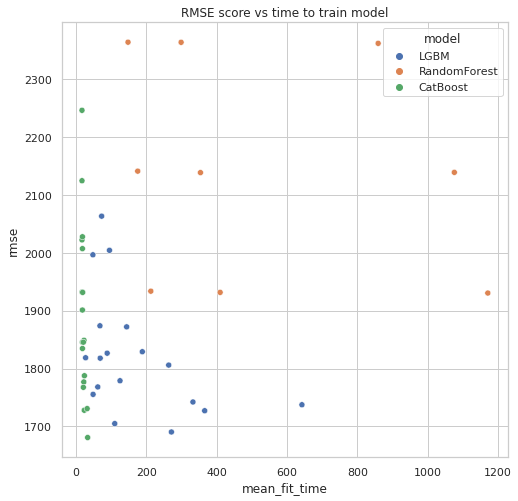

In [104]:
#plotting data
fig, axes = plt.subplots(1)
fig.set_size_inches(8,8)
sns.scatterplot(data=to_plot, x='mean_fit_time', y='rmse', hue="model", ax=axes) #, palette = pal

axes.set(title = 'RMSE score vs time to train model')
sns.set(style="whitegrid", color_codes=True, font_scale = 1)

In [112]:
test_rmse = [rmse_lgb, rmse_rf, rmse_cb]
i = 0
for model in ['LGBM', 'RandomForest', 'CatBoost']:
    mean_time = to_plot[to_plot['model'] == model]['mean_fit_time'].mean()
    mean_rmse = to_plot[to_plot['model'] == model]['rmse'].mean()
    print(f'Mean time to train for {model}: {mean_time:.1f}')
    print(f'Mean RMSE for {model}: {mean_rmse:.1f}')
    print(f'RMSE on test set: {test_rmse[i]:.1f}')
    i+=1
    print()

Mean time to train for LGBM: 167.7
Mean RMSE for LGBM: 1822.9
RMSE on test set: 1672.6

Mean time to train for RandomForest: 522.8
Mean RMSE for RandomForest: 2144.9
RMSE on test set: 1924.7

Mean time to train for CatBoost: 20.7
Mean RMSE for CatBoost: 1891.0
RMSE on test set: 1665.6



We can see that with our chosen hyperparameters, CatBoost was the fastest to train on average, significantly faster than the other two models.
LGBM and CatBoost performed similarly well during cross validation, with LGBM having a slightly better mean RMSE than CatBoost (1822.9 vs 1891.0) but CatBoost performed marginally better on the test set than LGBM (1665.6 vs 1672.6).

RandomForest took longer to train on average and had the worst RMSE on average.

However, only a few hyperparameter combinations were tested and there is no guarantee these observations would be true for different hyperparameters for each model.

